In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


/var/folders/8j/skd2y7rd5k752cwx0v97h73c0000gn/T/ipykernel_86623/3496797893.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
cont_features = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
train_df.drop(cont_features, axis=1, inplace=True)
train_df.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [21]:
result = train_df.groupby(train_df['Cabin'].isnull())['Cabin'].first()
result = train_df['Cabin'].isnull().mean()
result
print(f"Процент пропущенных значений в столбце 'Cabin': {result:.2f}%")


Процент пропущенных значений в столбце 'Cabin': 0.77%


In [22]:
train_df['Cabin_indicator'] = np.where(train_df['Cabin'].isnull(), 0, 1)
train_df.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_indicator
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


/Users/iqazaq/coding/SelfEducation/EDA/venv/lib/python3.11/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


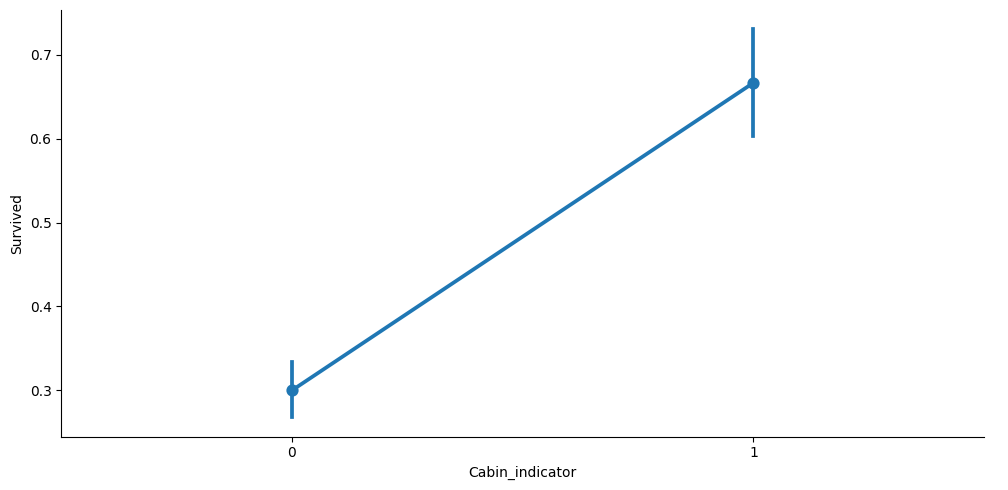

/Users/iqazaq/coding/SelfEducation/EDA/venv/lib/python3.11/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


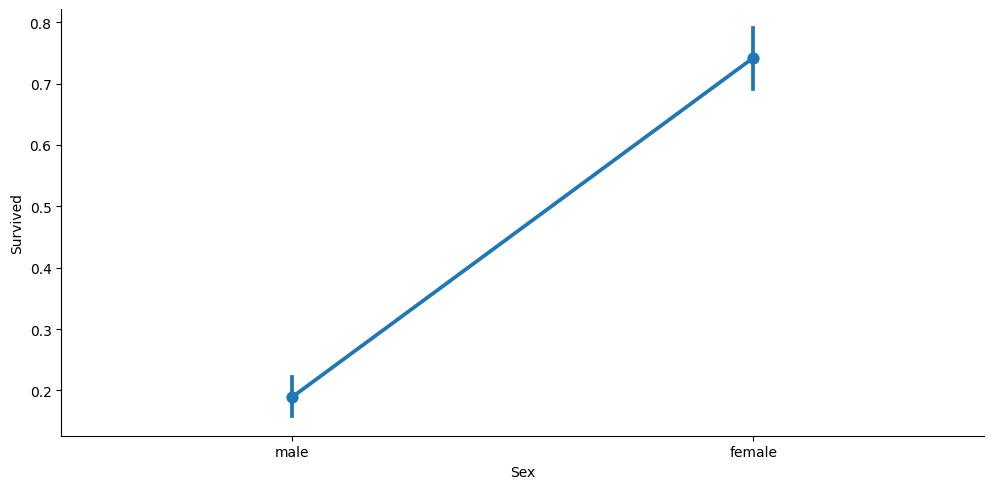

/Users/iqazaq/coding/SelfEducation/EDA/venv/lib/python3.11/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


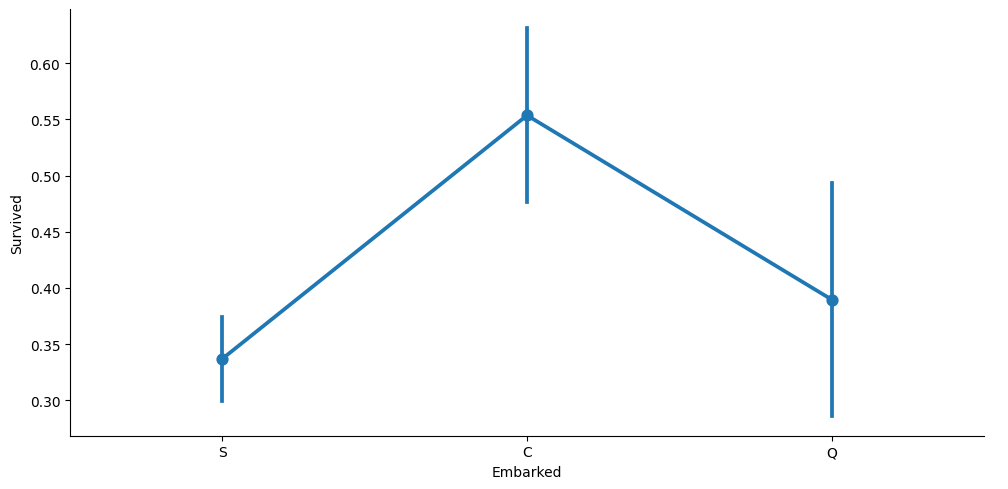

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

for i, col in enumerate(['Cabin_indicator', 'Sex', 'Embarked']):
    #fig, ax = plt.subplots()
    sns.catplot(x=col, y='Survived', data=train_df, kind='point', aspect=2, ax=ax)
    plt.show()


In [31]:
train_df.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [32]:
train_df.pivot_table('Survived', index='Cabin_indicator', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_indicator,,,
0,99,73,515
1,69,4,129


In [33]:
train_df.drop('Ticket', axis=1, inplace=True)
train_df.head(10)

,Survived,Sex,Cabin,Embarked,Cabin_indicator
0,0,male,NaN,S,0
1,1,female,C85,C,1
2,1,female,NaN,S,0
3,1,female,C123,S,1
4,0,male,NaN,S,0
5,0,male,NaN,Q,0
6,0,male,E46,S,1
7,0,male,NaN,S,0
8,1,female,NaN,S,0
9,1,female,NaN,C,0


In [34]:
binary_gender = {'male':0, 'female': 1}
train_df['Sex'] = train_df['Sex'].map(binary_gender)
train_df.head()

,Survived,Sex,Cabin,Embarked,Cabin_indicator
0,0,0,NaN,S,0
1,1,1,C85,C,1
2,1,1,NaN,S,0
3,1,1,C123,S,1
4,0,0,NaN,S,0


In [35]:
train_df.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
train_df.head()

,Survived,Sex,Cabin_indicator
0,0,0,0
1,1,1,1
2,1,1,0
3,1,1,1
4,0,0,0
